<a href="https://colab.research.google.com/github/ginograf/DSF/blob/main/CodingTask2_GinoGraf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2 Solutions Gino Graf

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

1) Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

2) With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

3) Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 

4) Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

# 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

import skimage.filters as skf
import skimage.morphology as skm

In [2]:
!pip install pillow_heif 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 65.3 MB/s eta 0:00:00


In [3]:
import pillow_heif
from PIL import Image
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/'

In [6]:
input_dir = path + 'images for CT2/'
output_dir = path + 'images_png/'

In [7]:
# Loop through all the files in the input directory
for filename in os.listdir(input_dir):
      # Open the HEIC image using Pillow
      heic_image = pillow_heif.read_heif(input_dir + filename)
      # From Notebook 11:
      image = Image.frombytes(heic_image.mode, heic_image.size, heic_image.data.tobytes(), "raw")  
      url_name = filename.split('.')[0] + '.png'
      image.save(output_dir + url_name, format="png")
      # Saves png images in a separate folder

#2)

(4032, 3024, 3) (4032, 3024)


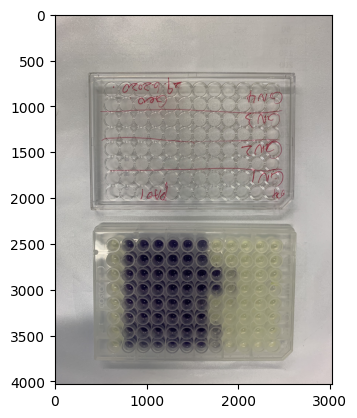

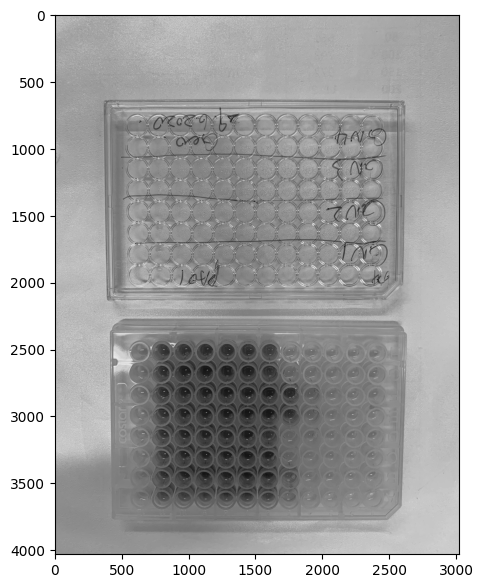

In [8]:
imageRGB  = io.imread(output_dir+'IMG_5379.png')
plt.imshow(imageRGB)
image = imageRGB[:,:,2]
print(imageRGB.shape,image.shape)
plt.figure(figsize=(7,7))
plt.imshow(image,cmap = 'gray')
plt.show()

(2016, 3024)


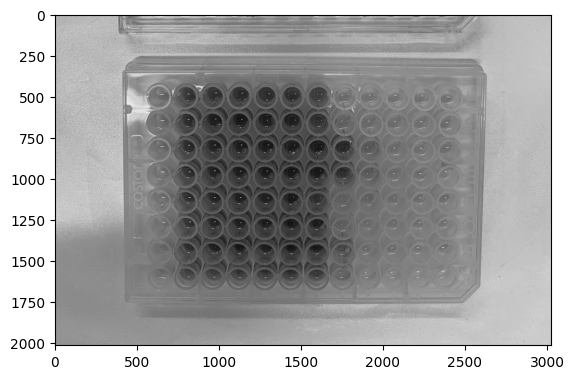

In [9]:
#Cut the upper part of the image
image = image[image.shape[0]//2:image.shape[0],:]
print(image.shape)
plt.imshow(image, cmap ='gray')
plt.show()

<ipython-input-10-b04e963f572b>:2: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(30))


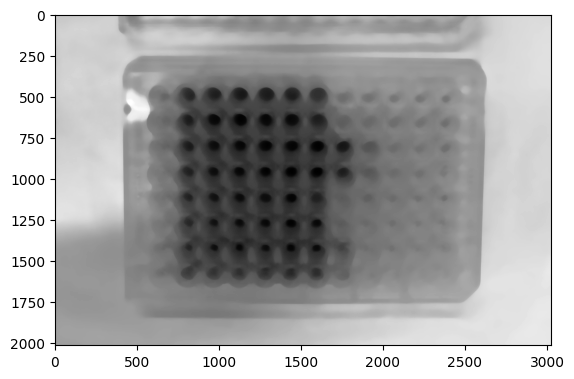

In [10]:
#Filtering
image_mean = skf.median(image,selem=skm.disk(30))
plt.imshow(image_mean, cmap ='gray')
plt.show()

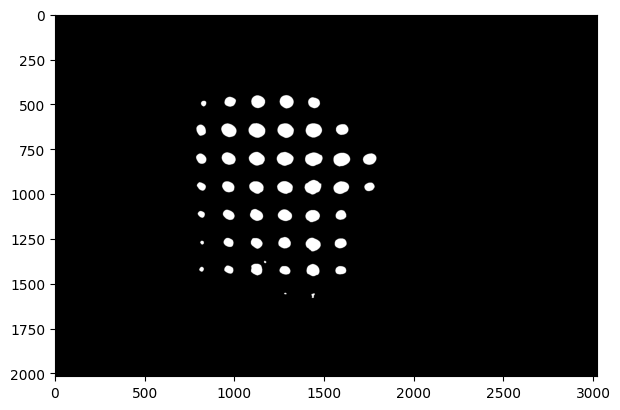

In [11]:
threshold_manual = 55

#create a mask
image_threshold = image_mean<threshold_manual

plt.figure(figsize=(7, 7))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

#3)

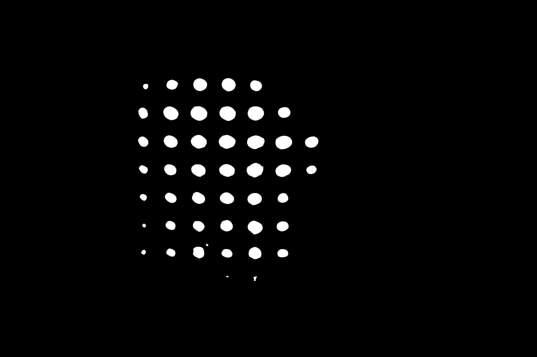

In [16]:
black_white_image = Image.open(path + 'black_white_image2.png')
black_white_image

In [32]:
from PIL import Image

# Open the image file
image = Image.open(path + "black_white_image2.png")

# Convert the image to grayscale
image = image.convert('L')

# Get the pixel values as a list of tuples
pixels = list(image.getdata())

# Count the number of white pixels
white_pixels = len([pixel for pixel in pixels if pixel == 255])

print("Number of white pixels:", white_pixels)

Number of white pixels: 3531


In [47]:
from skimage import io, filters, measure

# Load the image
image2 = io.imread(path + "black_white_image2.png")

# Apply thresholding to create a binary image
threshold = 55
binary_image = image2 > threshold

# Label the connected regions in the binary image
labels = measure.label(binary_image)

# Filter the labeled regions by size
regions = measure.regionprops(labels)

# Count the number of white spots
num_spots = len(regions)

print("Number of white spots:", num_spots)



Number of white spots: 1


#4)

In [ ]:
-